<a href="https://colab.research.google.com/github/zincarvalho/mapa_historico_hanseniase_br/blob/main/mapa_hist%C3%B3rico_hanseniase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
pip install geopandas matplotlib

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

def gerar_mapa_historico():
    # 1. Configuração do Mapa Base (Via URL para estados)
    print("Baixando dados geográficos dos estados...")
    try:
        # URL de um GeoJSON confiável com os estados do Brasil
        url_brazil = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
        brazil_states = gpd.read_file(url_brazil)

    except Exception as e:
        print(f"Erro ao carregar mapa online dos estados: {e}")
        return

    # Renomear coluna 'name' para 'state_name' para facilitar o merge e padronizar
    brazil_states = brazil_states.rename(columns={'name': 'state_name'})
    # Corrigir nomes de estados no GeoJSON se necessário para o merge
    brazil_states['state_name'] = brazil_states['state_name'].replace({
        'Piau\u00ed': 'Piauí',
        'Paran\u00e1': 'Paraná',
        'Amap\u00e1': 'Amapá',
        'Goi\u00e1s': 'Goiás',
        'Cear\u00e1': 'Ceará',
        'Rond\u00f4nia': 'Rondônia',
        'Acre': 'Acre',
        'Bahia': 'Bahia',
        'Tocantins': 'Tocantins',
        'Rio Grande do Sul': 'Rio Grande do Sul',
        'Rio Grande do Norte': 'Rio Grande do Norte',
        'Para\u00edba': 'Paraíba',
        'Pernambuco': 'Pernambuco',
        'Sergipe': 'Sergipe',
        'Alagoas': 'Alagoas',
        'Minas Gerais': 'Minas Gerais',
        'S\u00e3o Paulo': 'São Paulo',
        'Rio de Janeiro': 'Rio de Janeiro',
        'Esp\u00edrito Santo': 'Espírito Santo',
        'Santa Catarina': 'Santa Catarina',
        'Mato Grosso': 'Mato Grosso',
        'Mato Grosso do Sul': 'Mato Grosso do Sul',
        'Amazonas': 'Amazonas',
        'Par\u00e1': 'Pará',
        'Roraima': 'Roraima',
        'Distrito Federal': 'Distrito Federal'
    })


    # 2. Configuração da Plotagem
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_facecolor('#ADD8E6')  # Cor do Oceano (Azul claro)

    # Plota os estados individualmente com cor base neutra
    brazil_states.plot(ax=ax, color='#E0E0E0', edgecolor='#A0A0A0', linewidth=0.7)

    # 3. Dados do Texto (Coordenadas Aproximadas) - Camada 1 (Séc. XVII-XVIII)
    locais_camada1 = {
        "Rio de Janeiro": {
            "coords": (-43.1729, -22.9068),
            "label": "Rio de Janeiro (Séc. XVII-XVIII)\n1º Lazareto (Porta de Entrada)",
            "pos_texto": (-40, -24) # Ajuste fino da posição do texto
        },
        "Bahia": {
            "coords": (-38.5016, -12.9777),
            "label": "Bahia (Séc. XVII-XVIII)\nFoco Colonial",
            "pos_texto": (-36, -13.777)
        },
        "Pará": {
            "coords": (-48.4902, -1.4558),
            "label": "Pará (Séc. XVII-XVIII)\nFoco Colonial",
            "pos_texto": (-46, 2)
        }
    }

    # Plotar Pontos e Textos - Camada 1
    for nome, dados in locais_camada1.items():
        x, y = dados["coords"]
        ax.plot(x, y, marker='o', color='#FF4500', markersize=10, markeredgecolor='black', zorder=5) # OrangeRed para Focos Iniciais
        ax.annotate(dados["label"], xy=(x, y), xytext=dados["pos_texto"],
                    textcoords='data', fontsize=9, fontweight='bold', family='serif',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9),
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    # Desenhar Setas de "Chegada" (Vindas do Oceano) - Camada 1
    fluxos_camada1 = [
        {"start": (-30, -28), "end": locais_camada1["Rio de Janeiro"]["coords"]},
        {"start": (-25, -15), "end": locais_camada1["Bahia"]["coords"]},
        {"start": (-35, 5), "end": locais_camada1["Pará"]["coords"]}
    ]
    for fluxo in fluxos_camada1:
        ax.annotate("", xy=fluxo["end"], xytext=fluxo["start"],
                    arrowprops=dict(arrowstyle="->", color='#0000CD', lw=2, connectionstyle="arc3,rad=-0.2")) # MediumBlue para Fluxo de Entrada

    # Camada 2: A Interiorização e Expansão (Séc. XVIII - XIX)
    locais_camada2 = {
        "Pernambuco": {"coords": (-35.0, -8.0), "label": "Pernambuco (Séc. XVIII-XIX)\nFoco Interiorização", "pos_texto": (-32, -6)},
        "Paraíba": {"coords": (-35.5, -7.0), "label": "Paraíba (Séc. XVIII-XIX)\nFoco Interiorização", "pos_texto": (-32, -3)},
        "Alagoas": {"coords": (-36.5, -9.5), "label": "Alagoas (Séc. XVIII-XIX)\nFoco Interiorização", "pos_texto": (-33, -12)},
        "Manaus": {"coords": (-60.0, -3.0), "label": "Manaus (Séc. XVIII-XIX)\nFoco Amazônico", "pos_texto": (-65, -1.5)},
        "São Paulo": {"coords": (-46.6, -23.5), "label": "São Paulo (Séc. XVIII-XIX)\nFoco Bandeirante", "pos_texto": (-44, -26)},
        "Minas Gerais": {"coords": (-44.0, -19.0), "label": "Minas Gerais (Séc. XVIII-XIX)\nFoco Mineração", "pos_texto": (-40, -17)},
        "Mato Grosso": {"coords": (-56.0, -15.0), "label": "Mato Grosso (Séc. XVIII-XIX)\nFoco Bandeirante", "pos_texto": (-60, -12)},
        "Goiás": {"coords": (-49.0, -16.0), "label": "Goiás (Séc. XVIII-XIX)\nFoco Mineração", "pos_texto": (-45, -14)},
        "Região Sul": {"coords": (-52.0, -28.0), "label": "Região Sul (Séc. XVIII-XIX)\nFoco Expansão", "pos_texto": (-55, -31)}
    }

    # Plotar Pontos e Textos - Camada 2
    for nome, dados in locais_camada2.items():
        x, y = dados["coords"]
        ax.plot(x, y, marker='s', color='#006400', markersize=8, markeredgecolor='black', zorder=5) # DarkGreen para Focos Interiorização/Expansão
        ax.annotate(dados["label"], xy=(x, y), xytext=dados["pos_texto"],
                    textcoords='data', fontsize=8, fontweight='normal', family='sans-serif',
                    bbox=dict(boxstyle="square,pad=0.2", fc="#E6E6FA", ec="#4B0082", alpha=0.9),
                    arrowprops=dict(arrowstyle="-", color='#4B0082', lw=0.4))

    # Fluxos de dispersão - Camada 2 (Vetores econômicos e Bandeiras)
    fluxos_camada2 = [
        # Do Rio de Janeiro para Minas Gerais
        {"start": locais_camada1["Rio de Janeiro"]["coords"], "end": locais_camada2["Minas Gerais"]["coords"]},
        # Da Bahia para Minas Gerais
        {"start": locais_camada1["Bahia"]["coords"], "end": locais_camada2["Minas Gerais"]["coords"]},
        # De São Paulo para Minas Gerais
        {"start": locais_camada2["São Paulo"]["coords"], "end": locais_camada2["Minas Gerais"]["coords"]},
        # De São Paulo para Goiás
        {"start": locais_camada2["São Paulo"]["coords"], "end": locais_camada2["Goiás"]["coords"]},
        # De São Paulo para Mato Grosso
        {"start": locais_camada2["São Paulo"]["coords"], "end": locais_camada2["Mato Grosso"]["coords"]},
        # Do Pará para Manaus (Rio Amazonas)
        {"start": locais_camada1["Pará"]["coords"], "end": locais_camada2["Manaus"]["coords"]},
        # Do Nordeste para o interior (ex: Pernambuco para outros estados vizinhos como Paraíba, Alagoas)
        {"start": locais_camada2["Pernambuco"]["coords"], "end": locais_camada2["Paraíba"]["coords"]},
        {"start": locais_camada2["Pernambuco"]["coords"], "end": locais_camada2["Alagoas"]["coords"]},
        # Dispersão para o Sul (representativa, pode ser do litoral para o interior do Sul)
        {"start": (-48.0, -25.0), "end": locais_camada2["Região Sul"]["coords"]}
    ]
    for i, fluxo in enumerate(fluxos_camada2):
        ax.annotate("", xy=fluxo["end"], xytext=fluxo["start"],
                    arrowprops=dict(arrowstyle="->", color='#A52A2A', lw=1.5, connectionstyle="arc3,rad=0.1")) # Cor marrom para Fluxo de Dispersão

    # 6. Finalização e Títulos
    plt.title("Evolução da Hanseníase no Brasil\nSéc. XVII-XIX: Chegada, Interiorização e Expansão",
              fontsize=16, fontweight='bold', fontname='serif', pad=20)

    # Legenda Manual
    red_patch = mpatches.Patch(color='#FF4500', label='Focos Iniciais (Séc. XVII-XVIII)')
    blue_arrow = mpatches.Patch(color='#0000CD', label='Fluxo de Entrada (Mar, Séc. XVII-XVIII)')
    green_square = mpatches.Patch(color='#006400', label='Focos Interiorização/Expansão (Séc. XVIII-XIX)')
    brown_arrow = mpatches.Patch(color='#A52A2A', label='Fluxo de Dispersão (Vetores Econômicos/Bandeiras)')

    handles = [red_patch, blue_arrow, green_square, brown_arrow]

    plt.legend(handles=handles, loc='lower left', frameon=True)

    # Zoom na área de interesse (Corta o excesso de oceano) - Ajustado para Camada 2
    ax.set_xlim(-78, -28) # Expandido para incluir mais do leste e oeste
    ax.set_ylim(-36, 6)   # Expandido para incluir mais do norte e sul

    # Remover eixos (Latitude/Longitude) para ficar mais limpo
    ax.set_axis_off()

    plt.tight_layout()
    # plt.show() # Descomente para exibir o mapa
    plt.savefig("mapa_hanseniase_fase2.png", dpi=300) # Salvando como fase2 pois a 3 foi removida


Baixando dados geográficos dos estados...


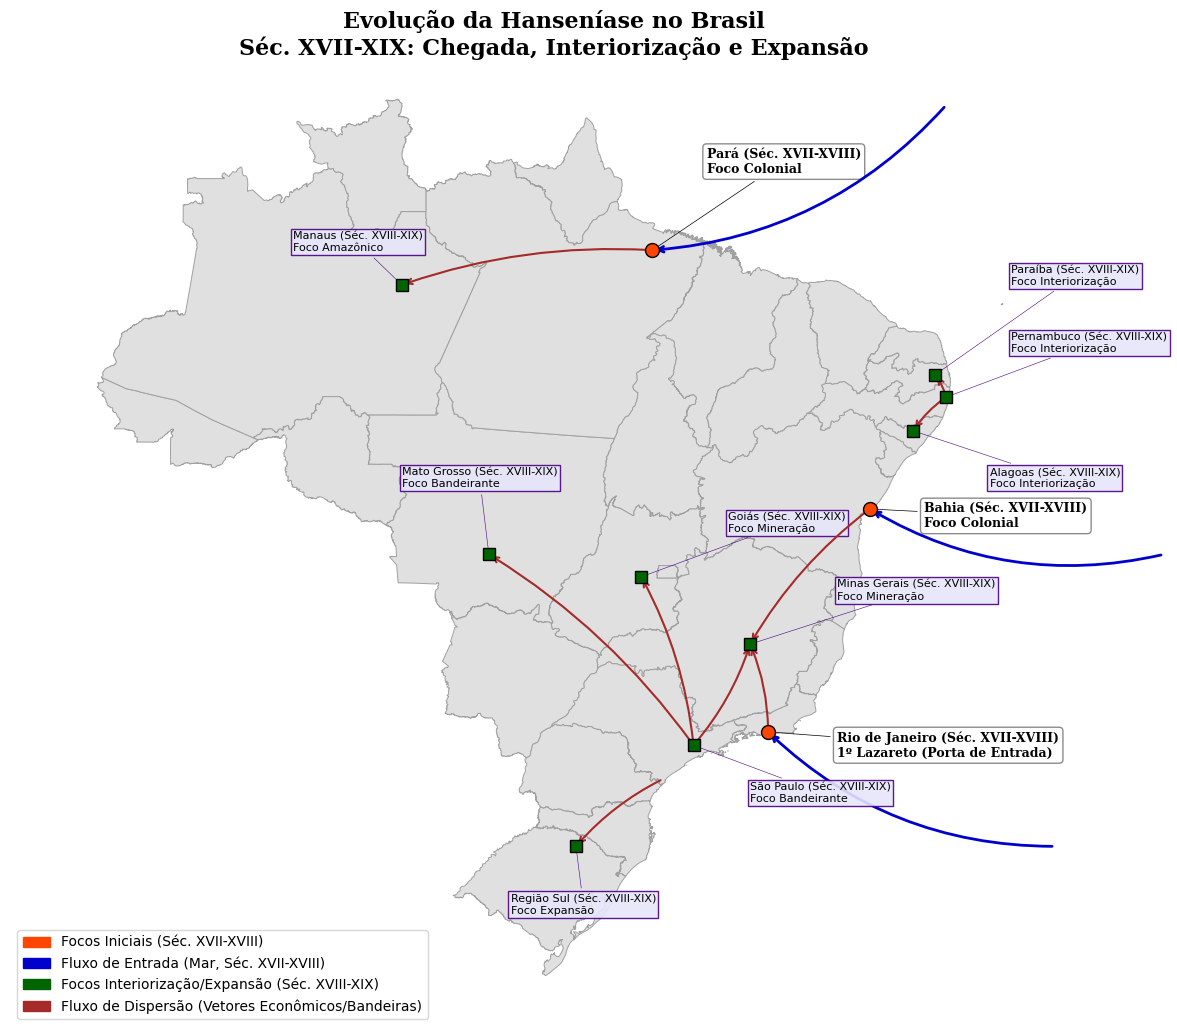

In [53]:
gerar_mapa_historico()